In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import defaultdict
import os

import seaborn as sns

# interpolation

In [2]:
files = {
    'fasttext': 'log/WRD_COS_interpolation_fasttext.csv',
    'fasttext_sw': 'log/WRD_COS_interpolation_fasttext_sw.csv',
    'glove42b': 'log/WRD_COS_interpolation_glove42b.csv',
    'glove840b':'log/WRD_COS_interpolation_glove840b.csv',
    'paragram': 'log/WRD_COS_interpolation_paragram.csv',
    'paranmt': 'log/WRD_COS_interpolation_paranmt.csv',
    'psl': 'log/WRD_COS_interpolation_psl.csv'
}
files = {
    'SUP+PSL': 'log/Interpolation_SUP_psl.csv'
}

In [41]:
def plot_interp(ax, pre, vectors):
    f = 'log/Interpolation_dev_{}_{}.csv'.format(pre, vectors)
    df = pd.read_csv(f)
    c_arr = df['coef_C'].unique()
    p_arr = df['coef_P'].unique()
    interp_matrix = np.zeros((len(c_arr), len(p_arr)))
    print(c_arr, p_arr)
    for i, (c, p, l, m, r) in df.iterrows():
        ic = i // len(p_arr)
        ip = i % len(p_arr)
        interp_matrix[ic, ip] = m
    interp_matrix *= 100
#     print(interp_matrix)
    im = ax.contourf(interp_matrix[:, :11], cmap=sns.color_palette("Spectral", as_cmap=True))
    if pre == 'WR':
#         ax.set_xticks(np.arange(11))
#         ax.set_xticklabels(["{:.2f}".format(v) for v in p_arr[:11].tolist()], rotation=45)
        ax.set_xticks([0, 3, 6, 10])
        ax.set_xticklabels(["0", "0.6", "10", "400"], rotation=45)
        ax.set_xlabel(r"$\epsilon$", fontsize=12)
    else:
        ax.set_xticks([])
    if vectors == 'word2vec':
        ax.set_yticks([0, 5, 10])
        ax.set_yticklabels(["0", "0.5", "1"])
        ax.set_ylabel(r"$\alpha$".format(vectors), fontsize=12)
    else:
        ax.set_yticks([])
        
    ind = np.unravel_index(np.argmax(interp_matrix, axis=None), interp_matrix.shape)
    ax.scatter(ind[1], ind[0], c='black')
    interp = interp_matrix[ind]
    wrd = interp_matrix[0][0]
    cos = interp_matrix[-1][-1]
    ax.set_title("({:.2f}, {:.2f}, {:.2f})".format(wrd, interp, cos), fontsize=10)
    return im


[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ] [0.00000000e+00 1.00000000e-01 2.51188643e-01 6.30957344e-01
 1.58489319e+00 3.98107171e+00 1.00000000e+01 2.51188643e+01
 6.30957344e+01 1.58489319e+02 3.98107171e+02]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ] [0.00000000e+00 1.00000000e-01 2.51188643e-01 6.30957344e-01
 1.58489319e+00 3.98107171e+00 1.00000000e+01 2.51188643e+01
 6.30957344e+01 1.58489319e+02 3.98107171e+02]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ] [0.00000000e+00 1.00000000e-01 2.51188643e-01 6.30957344e-01
 1.58489319e+00 3.98107171e+00 1.00000000e+01 2.51188643e+01
 6.30957344e+01 1.58489319e+02 3.98107171e+02]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ] [0.00000000e+00 1.00000000e-01 2.51188643e-01 6.30957344e-01
 1.58489319e+00 3.98107171e+00 1.00000000e+01 2.51188643e+01
 6.30957344e+01 1.58489319e+02 3.98107171e+02]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ] [0.00000000e+00 1.00000000e-01 2.51188643e-01 6.30957344e-01
 1.58489319e+00 3.98107171e+00 1.

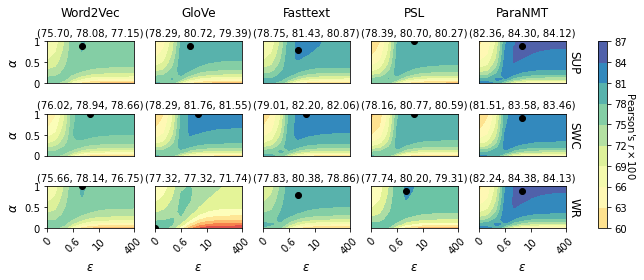

In [43]:



fig, ax = plt.subplots(nrows=3, ncols=5, figsize=(10, 4))
images = []
for j, vectors in enumerate(['word2vec', 'glove840b', 'fasttext', 'psl', 'paranmt']):
# for i, vectors in enumerate(['word2vec', 'glove840b', 'fasttext']):
    for i, pre in enumerate(['SUP', 'SWC', 'WR']):
        f = 'log/Interpolation_{}_{}.csv'.format(pre, vectors)
        if os.path.exists(f):
            im = plot_interp(ax[i][j], pre, vectors)
            images.append(im)

from matplotlib import colors
vmin = min(image.get_array().min() for image in images)
vmax = max(image.get_array().max() for image in images)
norm = colors.Normalize(vmin=vmin, vmax=vmax)
for im in images:
    im.set_norm(norm)

def update(changed_image):
    for im in images:
        if (changed_image.get_cmap() != im.get_cmap()
                or changed_image.get_clim() != im.get_clim()):
            im.set_cmap(changed_image.get_cmap())
            im.set_clim(changed_image.get_clim())


for im in images:
    im.callbacksSM.connect('changed', update)
    
pad = 5
for a, col in zip(ax[0], ['Word2Vec', 'GloVe', 'Fasttext', 'PSL', 'ParaNMT']):
    a.annotate(col, xy=(0.5, 1), xytext=(0, 5* pad),
                xycoords='axes fraction', textcoords='offset points',
                size='large', ha='center', va='baseline')

for a, row in zip(ax[:,-1], ['SUP', 'SWC', 'WR']):
    a.annotate(row, xy=(0, 0.5), xytext=(105, 0),
                xycoords=a.yaxis.label, textcoords='offset points',
                size='large', ha='right', va='center', rotation=-90)
    
fig.tight_layout()
cb = fig.colorbar(images[-1], ax=ax, orientation='vertical')
cb.set_label(r"Pearson's $r\times 100$", rotation=270, labelpad=10)
fig.savefig('/Users/zihao/Nutstore Files/我的坚果云/Research/Sentence Similarity + Prior OT/[EMNLP 2021][USTS with ROT]/interp_dev.pdf')

In [32]:
def get_subtable(df, word_vector, merge_STS=False):
    sdf = df[df['word vector'] == word_vector]
    data = defaultdict(list)

    datasets = datasets_core
    models = sdf['model'].unique()
    
    for ds in datasets:
        for m in models:
            _sdf = sdf[sdf['dataset'] == ds]
            _sdf = _sdf[_sdf['model'] == m]
            score_sr = _sdf['score']
            if len(score_sr):
                score = float(score_sr.tolist()[0])
                data[ds].append(score)
                
    if merge_STS:
        sts_list = ["sts:" + str(y) for y in range(2012, 2017)]
        for sts in sts_list:
            score_arr = np.asarray([data[ds] for ds in datasets if sts in ds])
            score = np.mean(score_arr, axis=0).tolist()
            data[sts] = score
        
    nds = pd.DataFrame(data, index=models)
    return nds, data

    

# Major Comparison

In [87]:
from model.word_vector import VectorNames
datasets_short_list = [
    'stsb:test',
#     'stsb:dev',
#     'twitter:test',
    'sick:r', 
    'sts:2012',
    'sts:2013',
    'sts:2014',
    'sts:2015',
    'sts:2016',
]
datasets_full_list = [
    'stsb:test',
    'twitter:test',
    'sick:r', 
    'sts:2012',
    'sts:2013',
    'sts:2014',
    'sts:2015',
    'sts:2016',
]
datasets_core = [
    'stsb:test',
#     'stsb:dev',
    'twitter:test',
    'sick:r',
]

In [98]:
def show_rots(which_rots=None, sort=False, save=True, prefix="", datasets=[]):
    baselinefiles = {
#         'COS+SUP': "log/major_compare_COS+SUP/major_comparison.csv",
#         'WRD+SUP': 'log/major_compare_WRD+SUP/major_comparison.csv',        
#         'WRD+SUP+levels': 'log/major_compare_WRD+SUP+levels/major_comparison.csv',
#         'ROTS+SUP': "log/major_compare_ROTS+SUP/major_comparison.csv",
#         'ROTS+SUP_spearmanr': "log/major_compare_spearmanr_ROTS+SUP/major_comparison.csv",
   
#         'COS+SWC': "log/major_compare_COS+SWC/major_comparison.csv",
#         'WRD+SWC': 'log/major_compare_WRD+SWC/major_comparison.csv',
#         'WRD+SWC+levels': 'log/major_compare_WRD+SWC+levels/major_comparison.csv',
        'ROTS+SWC': "/Users/zihao/Project/rots/log/major_compare_spearmanr_paranmt_ROTS+SWC/major_comparison.csv",
#         'ROTS+SWC_spearmanr': "log/major_compare_spearmanr_ROTS+SWC/major_comparison.csv",
        
#         'COS+WR': "log/major_compare_COS+WR/major_comparison.csv",
#         'WRD+WR': 'log/major_compare_WRD+WR/major_comparison.csv',
#         'WRD+WR+levels': 'log/major_compare_WRD+WR+levels/major_comparison.csv',
        'ROTS+WR': "/Users/zihao/Project/rots/log/major_compare_spearmanr_paranmt_ROTS+WR/major_comparison.csv",
#         'ROTS+WR_spearmanr': "log/major_compare_spearmanr_ROTS+WR/major_comparison.csv"
    }
    df = pd.DataFrame()
    for k, path in baselinefiles.items():
        _df = pd.read_csv(path)
        df = df.append(_df)


#     for wv in VectorNames:
    for wv in ['paranmt']:
        nds, _ = get_subtable(df, wv)
        print("="*10)
        print(wv)
        if len(datasets):
            show = nds[datasets]
        else:
            show = nds
#         show = nds
        show['mean'] = show.agg('mean', axis='columns')
#         s = 0
#         for stsyear in ['sts:2012', 'sts:2013', 'sts:2014', 'sts:2015', 'sts:2016']:
#             s += show[stsyear]
#         show['mean 12-16'] = s / 5
        if sort:
            show = show.sort_values('mean', ascending=False)
        show = show.applymap(lambda f: "{:.2f}".format(f*100))
        print(show.to_latex())
        if save:
            show.to_csv('out/{}-{}.csv'.format(prefix, wv), index_label='similarity')

        
def get_subtable(df, word_vector, merge_STS=True):
    sdf = df[df['word vector'] == word_vector]
    data = defaultdict(list)

    datasets = sdf['dataset'].unique()
    models = sdf['model'].unique()
#     models = []
#     for m in _models:
#         if m.split('+')[0] == 'ROTS' and not m.endswith('4'):
#             continue
#         models.append(m)
    
    for ds in datasets:
        for m in models:
            _sdf = sdf[sdf['dataset'] == ds]
            _sdf = _sdf[_sdf['model'] == m]
            score_sr = _sdf['score']
            if len(score_sr):
                score = float(score_sr.tolist()[0])
                data[ds].append(score)
                
    if merge_STS:
        sts_list = ["sts:" + str(y) for y in range(2012, 2017)]
        for sts in sts_list:
            score_arr = np.asarray([data[ds] for ds in datasets if sts in ds])
            score = np.mean(score_arr, axis=0).tolist()
            data[sts] = score
    model_names = []
    for m in models:
        if 'levels' in m:
            m = m.replace('levels', 'L')
        model_names.append(m)
    nds = pd.DataFrame(data, index=model_names)
    return nds, data

In [99]:
kvs = [
#     ('ablation-depth', ['stsb:test']),
    ('benchmark', datasets_short_list),
#     ('ablation-core', datasets_core),
#     ('full-list', datasets_full_list)
]
for prefix, datasets in kvs:
    show_rots(sort=False, save=True, prefix=prefix, datasets=datasets)

paranmt
\begin{tabular}{lllllllll}
\toprule
{} & stsb:test & sick:r & sts:2012 & sts:2013 & sts:2014 & sts:2015 & sts:2016 &   mean \\
\midrule
ROTS+SWC0    &     78.61 &  63.75 &    64.88 &    62.24 &    74.13 &    78.95 &    76.51 &  71.30 \\
ROTS+SWC1    &     78.67 &  65.17 &    64.91 &    62.18 &    74.13 &    78.91 &    76.49 &  71.49 \\
ROTS+SWC2    &     78.51 &  65.70 &    64.78 &    62.08 &    74.08 &    79.20 &    76.37 &  71.53 \\
ROTS+SWC3    &     78.37 &  65.72 &    64.77 &    61.87 &    74.11 &    79.18 &    75.93 &  71.42 \\
ROTS+SWC4    &     78.27 &  65.57 &    64.56 &    61.87 &    74.11 &    79.32 &    75.85 &  71.37 \\
ROTS+SWCmean &     78.66 &  65.30 &    64.88 &    62.08 &    74.24 &    79.16 &    76.38 &  71.53 \\
ROTS+SWCmax  &     78.27 &  65.57 &    64.56 &    61.87 &    74.11 &    79.33 &    75.84 &  71.36 \\
ROTS+SWCmin  &     78.57 &  63.76 &    64.86 &    62.14 &    74.01 &    78.75 &    76.43 &  71.22 \\
ROTS+SWClast &     78.09 &  64.86 &    64.38 &  

<ipython-input-98-651c1bbfe998>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  show['mean'] = show.agg('mean', axis='columns')


# benchmark study with BCa confidence interval

In [100]:
baselinefiles = {
        'COS+SUP': "log/major_compare_COS+SUP/major_comparison.csv",
        'WRD+SUP': 'log/major_compare_WRD+SUP/major_comparison.csv',        
#         'WRD+SUP+levels': 'log/major_compare_WRD+SUP+levels/major_comparison.csv',
        'ROTS+SUP': "log/major_compare_ROTS+SUP/major_comparison.csv",
#         'ROTS+SUP_spearmanr': "log/major_compare_spearmanr_ROTS+SUP/major_comparison.csv",
   
        'COS+SWC': "log/major_compare_COS+SWC/major_comparison.csv",
        'WRD+SWC': 'log/major_compare_WRD+SWC/major_comparison.csv',
#         'WRD+SWC+levels': 'log/major_compare_WRD+SWC+levels/major_comparison.csv',
        'ROTS+SWC': "log/major_compare_ROTS+SWC/major_comparison.csv",
#         'ROTS+SWC_spearmanr': "log/major_compare_spearmanr_ROTS+SWC/major_comparison.csv",
        
        'COS+WR': "log/major_compare_COS+WR/major_comparison.csv",
        'WRD+WR': 'log/major_compare_WRD+WR/major_comparison.csv',
#         'WRD+WR+levels': 'log/major_compare_WRD+WR+levels/major_comparison.csv',
        'ROTS+WR': "log/major_compare_ROTS+WR/major_comparison.csv",
#         'ROTS+WR_spearmanr': "log/major_compare_spearmanr_ROTS+WR/major_comparison.csv"
    }
for pre in ['SUP','SWC', 'WR']:
    pre_df = None
    score = 0
    for sim in ['COS', 'WRD', 'ROTS']:
        data = defaultdict(list)
        name = sim + '+' + pre
        df = pd.read_csv(baselinefiles[name])
        df = df[df['word vector'] == 'fasttext']
        for _, row in df.iterrows():
            if sim == 'ROTS':
                if not row['model'].endswith('4'):
                    continue
            data[sim+"_Pearson's r"].append(row['score']*100)
            data[sim+'_BCa 95% CI'].append("[{:.2f}, {:.2f}]".format(row['left'] * 100, row['right'] * 100))
            data[sim+'CI width'].append(- row['left'] * 100 + row['right'] * 100)
            data['dataset'].append(row['dataset'])
        gather_df = pd.DataFrame(data=data)
        gather_df = gather_df.set_index('dataset')
        score += gather_df[sim+"_Pearson's r"]
        if pre_df is not None:
            pre_df = pre_df.merge(gather_df, left_index=True, right_index=True)
        else:
            pre_df = gather_df
#     pre_df['mean'] = score / 3
    pre_df.applymap(lambda x: x if isinstance(x, str) else "{:.2f}".format(x))
    print(pre_df.shape)
    pre_df.to_csv('out/benchmark-uq-{}.csv'.format(pre, sim))


(29, 9)
(29, 9)
(29, 9)


# Ablation-depth

In [44]:
def get_ad_csv(wv):
    adfile = "out/ablation-core-{}.csv".format(wv)
    return pd.read_csv(adfile)

In [45]:
def get_bar_data(wv, pre):
    df = get_ad_csv(wv)
    data = {}
    for _, row in df.iterrows():
        similarity = row['similarity']
        base = similarity.split('+')[0]        
        value = row['mean']

#         print(pre, similarity)
        if not pre in similarity:
            continue

        if base == "COS":
            data[base] = value
        if base == "WRD" and len(similarity) < 8:
            data[base] = value
        if base == "WRD" and len(similarity) > 8:
            L = similarity[-1]
            if L == '0': 
                continue
            data["PRD+L"+L] = value
        if base == "ROTS":
            if 'WR' in similarity:
                var = similarity[7:]
            else:
                var = similarity[8:]
            if len(var) == 1:
                if var == '0':
                    continue
                var = 'L' + var
            data[base+"+"+var] = value
    return data

data = get_bar_data('paranmt', '+WR')


In [74]:
colors = {
    'COS': 'dimgray',
    'WRD': 'burlywood',
    'ROTS+mean': 'blueviolet',
    'ROTS+max': 'purple',
    'ROTS+min': 'violet',
    'ROTS+last': 'thistle',
}

defaultdict(<class 'list'>, {'COS': [66.97, 66.45, 65.11], 'WRD': [66.26, 66.63, 66.2], 'PRD+L1': [62.72, 63.67, 62.57], 'PRD+L2': [63.45, 64.32, 63.76], 'PRD+L3': [64.92, 65.55, 65.17], 'PRD+L4': [65.46, 65.99, 65.57], 'ROTS+L1': [66.95, 66.8, 65.54], 'ROTS+L2': [67.06, 66.93, 65.75], 'ROTS+L3': [67.31, 67.14, 66.01], 'ROTS+L4': [67.52, 67.45, 66.47], 'ROTS+mean': [67.24, 67.1, 65.98], 'ROTS+max': [67.48, 67.41, 66.41], 'ROTS+min': [66.61, 66.28, 64.92], 'ROTS+last': [67.45, 67.26, 66.22]})
defaultdict(<class 'list'>, {'COS': [66.97, 66.45, 65.11], 'WRD': [66.26, 66.63, 66.2], 'PRD+L1': [62.72, 63.67, 62.57], 'PRD+L2': [63.45, 64.32, 63.76], 'PRD+L3': [64.92, 65.55, 65.17], 'PRD+L4': [65.46, 65.99, 65.57], 'ROTS+L1': [66.95, 66.8, 65.54], 'ROTS+L2': [67.06, 66.93, 65.75], 'ROTS+L3': [67.31, 67.14, 66.01], 'ROTS+L4': [67.52, 67.45, 66.47], 'ROTS+mean': [67.24, 67.1, 65.98], 'ROTS+max': [67.48, 67.41, 66.41], 'ROTS+min': [66.61, 66.28, 64.92], 'ROTS+last': [67.45, 67.26, 66.22]}) defaul

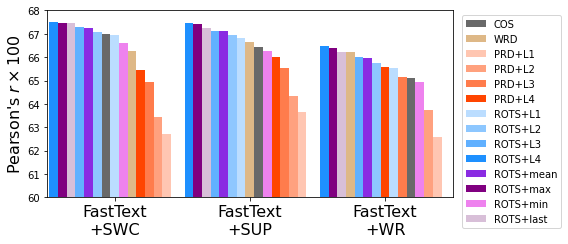

In [84]:
wv_names = {
    'fasttext': "FastText", 'glove840b': "GloVe", 'word2vec': "Word2Vec", 'psl': "PSL", 'paranmt': "ParaNMT"
}
import matplotlib as mpl
mpl.rcParams['hatch.linewidth'] = 0.3  # previous pdf hatch linewidth

def plot_bars(wvs, pres):
    labels = []
    data = defaultdict(list)
    for pre in pres:
        for wv in wvs:
            labels.append(wv_names[wv] + '\n+' + pre)
            d = get_bar_data(wv, pre)
            for k, v in d.items():
                data[k].append(v)
    # data[similarity] = [label#1 score, label#2 score, ...]
    # order[similarity] = [label#! order, label#2 order, ...]
    print(data)
    order = defaultdict(list)
    for i in range(len(labels)):
        score_list = [(k, data[k][i]) for k in data]
        sorted_score_list = sorted(score_list, key=lambda x: x[1], reverse=True)
        for i, (k, _) in enumerate(sorted_score_list):
            order[k].append(i)
    
    print(data, order)
    
    x = np.arange(len(labels))
    width = 0.9
    fig, ax = plt.subplots(figsize=(8, 3.5))
    bars = []
    
    def get_pos(_x, order): 
        return _x + width/len(data) * (order - len(data) // 2)
    
    for i, (k, v) in enumerate(data.items()):
        print(i, k, v)
        formatting = {}
        if k in colors:
            formatting['color'] = colors[k]
        elif 'ROTS' in k:
            formatting['color'] = 'dodgerblue'
        elif 'PRD' in k:
            formatting['color'] = 'orangered'
        
        if 'L1' in k:
            formatting['alpha'] = 0.3
        elif 'L2' in k:
            formatting['alpha'] = 0.5
        elif 'L3' in k:
            formatting['alpha'] = 0.7
        elif 'l4' in k:
            formatting['alpha'] = 0.9
        
        positions = [get_pos(_x, order[k][_x]) for _x in range(len(labels))]
        bar = ax.bar(positions, v, width/len(data), label=k, **formatting)
    
    ax.set_ylabel(r"Pearson's $r \times 100$", fontsize=16)
    ax.set_ylim([60, 68])
#     ax.set_title("Ablation Study in Depth and Aggregation", fontsize=16)
    ax.set_xticks(x)
    ax.set_xticklabels(labels, fontsize=16)
    ax.set_xlim([-0.5, len(labels)-0.5])
    ax.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
#     ax.plot(np.linspace(-1, 20), np.ones(50)*65, ':')
    fig.tight_layout()
    fig.savefig('/Users/zihao/Nutstore Files/我的坚果云/Research/Sentence Similarity + Prior OT/[EMNLP 2021][USTS with ROT]/ablation_depth.pdf')
# plot_bars(['fasttext', 'glove840b', 'word2vec', 'psl', 'paranmt'], ['SWC', 'SUP', 'WR'])
plot_bars(['fasttext'], ['SWC', 'SUP', 'WR'])

# strength

In [30]:
file = 'log/hyperparameter_dev_SWC_fasttext.csv'

In [60]:
def plot_CP(ax, file):
    df = pd.read_csv(file)
    clist = df['correction'].unique().tolist()
    plist = df['prior'].unique().tolist()
    print(clist, plist)
    
    
    for c in clist:
        pline = []
        cdf = df[df['correction'] == c]
        for p in plist:
            cpdf = cdf[cdf['prior'] == p]
            score = cpdf['mid'].mean()
            pline.append(score*100)
        ax.plot(plist, pline, 'o-', label=r'$\alpha={:.2f}$'.format(c))
    
    ax.set_xlabel(r'Prior $\epsilon$', fontsize=18)
    ax.set_xlim([0, 16])
    ax.set_ylim([49, 70])



[0.0, 0.25, 0.5, 0.75, 1.0] [1.0, 4.0, 7.0, 10.0, 13.0, 16.0]
[0.0, 0.25, 0.5, 0.75, 1.0] [1.0, 4.0, 7.0, 10.0, 13.0, 16.0]
[0.0, 0.25, 0.5, 0.75, 1.0] [1.0, 4.0, 7.0, 10.0, 13.0, 16.0]


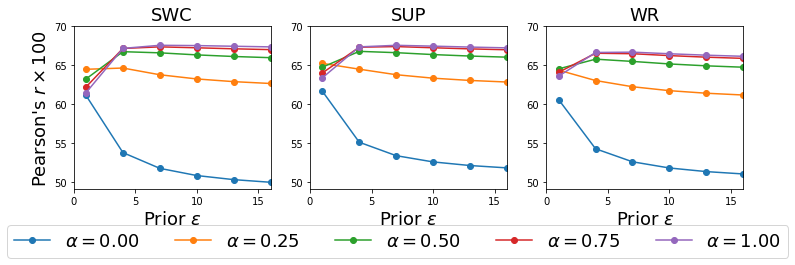

In [63]:
fformat = 'log/hyperparameter_dev_{}_{}.csv'

fig, axes = plt.subplots(ncols=3, figsize=(12, 3))

for i, wv in enumerate(['fasttext']):
    for j, pre in enumerate(['SWC', 'SUP', 'WR']):
        plot_CP(axes[j], fformat.format(pre, wv))
        axes[j].set_title(pre, fontsize=18)

axes[0].set_ylabel(r"Pearson's $r\times 100$", fontsize=18)

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.), ncol=5, fontsize=18)
# fig.tight_layout()
fig.savefig("/Users/zihao/Nutstore Files/我的坚果云/Research/Sentence Similarity + Prior OT/[EMNLP 2021][USTS with ROT]/ec.png")

# Prepare the Appendix

## breakdown of core datasets with different parameters

In [33]:
for wv in VectorNames:
    for pre in ['SWC', 'SUP', 'WR']:
        show_data = defaultdict(list)
        for ds in datasets_full_list:
            for model in ['WRD', 'COS', 'ROTS']:
                filename = "log/major_compare_{}+{}/major_comparison.csv".format(model, pre)
                df = pd.read_csv(filename)
                sdf = df[df['dataset'] == ds]
                sdf = sdf[sdf['word vector'] == wv]
                for i, row in sdf.iterrows():
                    left = row['left'] * 100
                    right = row['right'] * 100
                    score = row['score'] * 100
                    BCa = "[{:.2f}, {:.2f}]".format(left, right)
                    modelraw = row['model']
                    base = modelraw.split('+')[0]
                    if base == 'ROTS':
                        if len(modelraw) == 9:
                            model = base + '+L' + modelraw[-1]
                        else:
                            model = base + '+' + modelraw[8:]
                    else:
                        model = base
                    show_data['model'].append(model)
                    show_data['score'].append("{:.2f}".format(score))
                    show_data['BCa 95% CI'].append(BCa)
                    show_data['dataset'].append(ds)
#                     show_data['dataset'] = ds
        show = pd.DataFrame(show_data)
        show = show.set_index('model')
        print(show.to_string())
        show.to_csv("out/app_1-breakdown-{}-{}.csv".format(wv, pre))

           score      BCa 95% CI       dataset
model                                         
WRD        73.01  [70.32, 75.35]     stsb:test
COS        74.22  [71.73, 76.54]     stsb:test
ROTS+L0    73.93  [71.36, 76.25]     stsb:test
ROTS+L1    74.06  [71.43, 76.41]     stsb:test
ROTS+L2    74.15  [71.55, 76.46]     stsb:test
ROTS+L3    74.14  [71.58, 76.44]     stsb:test
ROTS+L4    74.47  [71.87, 76.78]     stsb:test
ROTS+mean  74.37  [71.81, 76.73]     stsb:test
ROTS+max   74.41  [71.83, 76.67]     stsb:test
ROTS+min   74.03  [71.44, 76.36]     stsb:test
ROTS+last  74.37  [71.84, 76.66]     stsb:test
WRD        46.01  [40.33, 51.24]  twitter:test
COS        43.76  [38.16, 48.85]  twitter:test
ROTS+L0    43.62  [38.07, 48.76]  twitter:test
ROTS+L1    43.83  [38.19, 49.15]  twitter:test
ROTS+L2    43.90  [38.10, 49.26]  twitter:test
ROTS+L3    44.45  [38.75, 49.74]  twitter:test
ROTS+L4    44.82  [39.21, 50.08]  twitter:test
ROTS+mean  44.19  [38.65, 49.45]  twitter:test
ROTS+max   44

In [ ]:
for wv in VectorNames:
    for pre in ['SWC', 'SUP', 'WR']:
        show_data = defaultdict(list)
        for ds in datasets_core:
            for model in ['WRD', 'COS', 'ROTS']:
                filename = "log/major_compare_{}+{}/major_comparison.csv".format(model, pre)
                df = pd.read_csv(filename)
                sdf = df[df['dataset'] == ds]
                sdf = sdf[sdf['word vector'] == wv]
                for i, row in sdf.iterrows():
                    left = row['left'] * 100
                    right = row['right'] * 100
                    score = row['score'] * 100
                    BCa = "[{:.2f}, {:.2f}]".format(left, right)
                    modelraw = row['model']
                    base = modelraw.split('+')[0]
                    if base == 'ROTS':
                        if len(modelraw) == 9:
                            model = base + '+L' + modelraw[-1]
                        else:
                            model = base + '+' + modelraw[8:]
                    else:
                        model = base
                    show_data['model'].append(model)
                    show_data['score'].append("{:.2f}".format(score))
                    show_data['BCa 95% CI'].append(BCa)
                    show_data['dataset'].append(ds)
#                     show_data['dataset'] = ds
        show = pd.DataFrame(show_data)
        show = show.set_index('model')
        print(show.to_string())
        show.to_csv("out/app_1-breakdown-{}-{}.csv".format(wv, pre))

# Case Study

In [34]:
from model import get_dataset
stsbtest = get_dataset(dataset_name='stsb:test')

[dataset] load dataset from tmp/stsb:test.data


In [35]:
import json

In [36]:
def parse_case_diff(file='test-COS.json', key=None):
    with open(file, 'rt') as f:
        d = json.load(f)
        
    def rank_array(scores):
        id_score = [(i, t) for i, t in enumerate(scores)]
        sorted_id_score = sorted(id_score, key=lambda x: x[1])
        rank_id = [(r, i) for r, (i, _) in enumerate(sorted_id_score)]
        rank_array = np.zeros(len(rank_id))
        for r, i in rank_id:
            rank_array[i] = r
        return rank_array

    targ_rank_array = rank_array(d['target'])
    if key == None:
        pred_rank_array = rank_array(d['predict'])
    else:
        pred_rank_array = rank_array(d['predict'][key])
    return targ_rank_array, pred_rank_array
parse_case_diff()

(array([ 607.,  922., 1282., ...,  307.,  110.,  111.]),
 array([ 877., 1235., 1264., ...,  199.,  157.,  230.]))

In [45]:
candidate_index = []
files = ['test-COS.json', 'test-WRD.json']
fstr = 'test-{}.json'
data = {}
rank = {}
for model in ['WRD', 'COS']:
    fn = fstr.format(model)
    with open(fn, 'rt') as f:
        d = json.load(f)
    data['gold'] = d['target']
    data[model] = d['predict']
    targ_rank, pred_rank = parse_case_diff(fn)
    rank['gold'] = targ_rank
    rank[model] = pred_rank

In [54]:
with open('test-ROTS.json', 'rt') as f:
    d = json.load(f)

pred = d['predict']

for k in ['1', '2', '3', '4', 'mean']:
    data['ROTS' + k] = pred[k]
    _, pred_rank = parse_case_diff('test-ROTS.json', key=k)
    rank['ROTS' + k] = pred_rank

print(data.keys())
print(rank.keys())
print(rank['ROTS1'])

dict_keys(['gold', 'WRD', 'COS', 'ROTS1', 'ROTS2', 'ROTS3', 'ROTS4', 'ROTSmean'])
dict_keys(['gold', 'WRD', 'COS', 'ROTS1', 'ROTS2', 'ROTS3', 'ROTS4', 'ROTSmean'])
[ 881. 1256. 1260. ...  200.  159.  229.]


In [55]:
case = defaultdict(list)
for i, (is1, is2, _) in enumerate(stsbtest.pairs):

    s1 = stsbtest.raw_sentences[is1]
    s2 = stsbtest.raw_sentences[is2]
    case['s1'].append(s1)
    case['s2'].append(s2)
    for k in data:
        case['score_' + k].append(data[k][i])
        case['rank_' + k].append(rank[k][i])
 
show = pd.DataFrame(data=case)
show.to_csv('out/case_study.csv')

In [56]:
case_df = pd.read_csv('out/case_study.csv')

In [60]:
case_df['score_gold'] /= 5

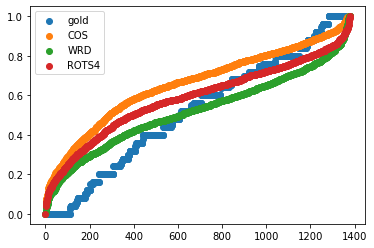

In [66]:
sims = ['gold', 'COS', 'WRD', 'ROTS4']
for s in sims:
    x = case_df['rank_'+s]
    y = case_df['score_'+s]
    y = (y - np.min(y)) / (np.max(y) - np.min(y))
    plt.scatter(x, y, label=s)
plt.legend()